## Group No 15

## Group Member Names:
1. Rishabh Setiya (2023AC05268) 100%
2. Hemank Lowe (2023AC05332) 100%
3. Mariyam Bhoira (2023AC05328) 100%
4. Sayali Aghav (2023AC05435) 100%


## Paper used for the implemetation
Title: Stock price prediction with optimized deep LSTM network with artificial rabbits optimization algorithm

URL: https://www.sciencedirect.com/science/article/pii/S0957417423008485

Authors: Burak Gülmez

Journal Name: Expert Systems with Applications

Year: 1 Oct 2023

# 1. Import the required libraries

In [ ]:
!pip install yfinance
!pip install keras-tuner

import yfinance as yf
import pandas as pd
import keras_tuner as kt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


# 2. Data Acquisition

We are getting the data from Yahoo Finance for the past 5 years of DJIA stocks



In [ ]:
# Define the tickers for the Dow Jones Industrial Average (DJIA) components
djia_tickers = [
    "AAPL", "MSFT", "AMGN", "AXP", "BA", "CAT", "CRM", "CSCO", "CVX", "DIS",
    "DOW", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD",
    "MMM", "MRK", "MS", "NKE", "PG", "TRV", "UNH", "V", "VZ", "WBA", "WMT"
]

# Define the start and end dates for the data
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)

# Create an empty dictionary to store the data for each ticker
stock_data = {}

# Loop through each ticker and download the data
for ticker in djia_tickers:
  try:
      data = yf.download(ticker, start=start_date, end=end_date)
      if not data.empty:  # Check if data was successfully downloaded
          stock_data[ticker] = data
      else:
          print(f"No data found for {ticker}")
  except Exception as e:
      print(f"Error downloading data for {ticker}: {e}")

#Example: Print the closing prices for AAPL
if 'AAPL' in stock_data:
    print(stock_data['AAPL']['Close'])

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Ticker            AAPL
Date                  
2020-03-10   69.246017
2020-03-11   66.841087
2020-03-12   60.240204
2020-03-13   67.457489
2020-03-16   58.779282
...                ...
2025-03-03  238.029999
2025-03-04  235.929993
2025-03-05  235.740005
2025-03-06  235.330002
2025-03-07  239.070007

[1256 rows x 1 columns]


# 3. Display the Data


In [ ]:
for ticker, data in stock_data.items():
  print(f"Data for {ticker}:")
  print(data)
  print("-" * 20) # separator between stocks

Data for AAPL:
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-03-10   69.246017   69.512966   65.370434   67.256054  285290000
2020-03-11   66.841087   68.246201   65.974721   67.316744  255598800
2020-03-12   60.240204   65.523326   60.184389   62.111260  418474000
2020-03-13   67.457489   67.930716   61.385659   64.283251  370732000
2020-03-16   58.779282   62.873271   58.242959   58.716183  322423600
...                ...         ...         ...         ...        ...
2025-03-03  238.029999  244.029999  236.110001  241.789993   47184000
2025-03-04  235.929993  240.070007  234.679993  237.710007   53798100
2025-03-05  235.740005  236.550003  229.229996  235.419998   47227600
2025-03-06  235.330002  237.860001  233.160004  234.440002   45170400
2025-03-07  239.070007  241.369995  234.759995  235.110001   46245700

[125

# 4 Prepare the data for training and validation

We selected a subset of stocks for hyperparameter optimization using rabbit optimization algorithm

In [ ]:
# Fetch stock data
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]  # Example stock tickers
start_date = "2020-01-01"
end_date = "2025-01-01"

data = yf.download(stocks, start=start_date, end=end_date)['High']
returns = data.pct_change().dropna()

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

x_train, y_train = [], []
x_val, y_val = [], []

train_size = int(len(data_scaled) * 0.8)

for i in range(10, train_size):
    x_train.append(data_scaled[i-10:i])
    y_train.append(data_scaled[i])

for i in range(train_size, len(data_scaled)):
    x_val.append(data_scaled[i-10:i])
    y_val.append(data_scaled[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_val, y_val = np.array(x_val), np.array(y_val)

[*********************100%***********************]  5 of 5 completed


#5. Deep Neural Network Architecture

We are optimizing the parameters x0 to x6 in the network defined here

In [ ]:
import tensorflow as tf
# Function to create the LSTM model
def create_lstm_model(x0, x1, x2, x3, x4, x5, x6):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(None, 1)))  # Define input shape separately
    model.add(tf.keras.layers.LSTM(x0, return_sequences=(True if x1 < 0.5 or x3 < 0.5 else False)))
    if x1 < 0.5:
        model.add(tf.keras.layers.LSTM(x2, return_sequences=(True if x3 < 0.5 else False)))
    if x3 < 0.5:
        model.add(tf.keras.layers.LSTM(x4, return_sequences=False))
    model.add(tf.keras.layers.Dense(x5))
    model.add(tf.keras.layers.Dropout(x6))
    model.add(tf.keras.layers.Dense(1))
    model.summary()
    return model


#6 Rabbit Optimization Algorithm

In [ ]:
# Rabbit Optimization Algorithm (ROA) for Hyperparameter Tuning
def initialize_rabbits(num_rabbits, bounds):
    return np.array([[random.uniform(b[0], b[1]) for b in bounds] for _ in range(num_rabbits)])

In [ ]:
def fitness(rabbit):
    print(f"Evaluating rabbit: {rabbit}")
    for i, p in enumerate(rabbit):
      if i in (1, 3):
          rabbit[i] = round(p)  # Round for indices 1 and 3
      elif i < 6:
          rabbit[i] = int(p)  # Convert to int for indices 0, 2, 4, 5
      else:
          rabbit[i] = float(p) # Keep as float for index 6
    rabbit = rabbit.tolist()
    rabbit = [int(x) if x == int(x) else x for x in rabbit]

    model = create_lstm_model(*rabbit)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=16, verbose=0)

    subset_size = min(200, len(x_val))
    loss = model.evaluate(x_val[:subset_size], y_val[:subset_size], verbose=0)[0]
    return loss


In [ ]:
def update_rabbits(rabbits, best_rabbit, alpha=0.05):
    for i in range(len(rabbits)):
        if random.random() < 0.5:
            rabbits[i] = best_rabbit + alpha * (rabbits[i] - best_rabbit)
        else:
            rabbits[i] += np.random.uniform(-alpha, alpha, size=rabbits.shape[1])
    return np.clip(rabbits, bounds[:, 0], bounds[:, 1])

In [ ]:
def rabbit_optimization(bounds, num_rabbits=10, max_iter=10):
    rabbits = initialize_rabbits(num_rabbits, bounds)
    best_rabbit, best_fitness = None, float('inf')
    print(f"Bounds: {bounds}")
    print(f"Number of Rabbits: {num_rabbits}")
    print(f"Max Iterations: {max_iter}")

    for _ in range(max_iter):
        fitness_values = [fitness(r) for r in rabbits]
        min_index = np.argmin(fitness_values)
        if fitness_values[min_index] < best_fitness:
            best_fitness = fitness_values[min_index]
            best_rabbit = rabbits[min_index]
        rabbits = update_rabbits(rabbits, best_rabbit)

    return best_rabbit, best_fitness

# Define bounds
bounds = np.array([(1,20), (0, 1), (1,20), (0, 1), (1, 20), (1, 20), (0.3, 0.7)])

# Run Rabbit Optimization Algorithm
best_params, best_loss = rabbit_optimization(bounds)

# Train and Save the Best Model
for i, p in enumerate(best_params):
    if i in (1, 3):
        best_params[i] = round(p)  # Round for indices 1 and 3
    elif i < 6:
        best_params[i] = int(p)  # Convert to int for indices 0, 2, 4, 5
    else:
        best_params[i] = float(p) # Keep as float for other indices
best_params = best_params.tolist()
best_params = [int(x) if x == int(x) else x for x in best_params]
best_model = create_lstm_model(*best_params)
best_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Save the trained model
best_model.save('best_lstm_model.h5')

print("Best hyperparameters using Rabbit Optimization:")
print(f"x0 (LSTM units 1): {int(best_params[0])}")
print(f"x1 (Add second LSTM layer): {round(best_params[1])}")
print(f"x2 (LSTM units 2): {int(best_params[2])}")
print(f"x3 (Add third LSTM layer): {round(best_params[3])}")
print(f"x4 (LSTM units 3): {int(best_params[4])}")
print(f"x5 (Dense units): {int(best_params[5])}")
print(f"x6 (Dropout rate): {best_params[6]:.2f}")


Bounds: [[ 1.  20. ]
 [ 0.   1. ]
 [ 1.  20. ]
 [ 0.   1. ]
 [ 1.  20. ]
 [ 1.  20. ]
 [ 0.3  0.7]]
Number of Rabbits: 10
Max Iterations: 10
Evaluating rabbit: [ 8.53629187  0.94583351  8.10477785  0.43973528  7.01827552 19.41568401
  0.36923198]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, None, 8)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 7)                   │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 19)                  │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 940 (3.67 KB)

 Trainable params: 940 (3.67 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [11.78906997  0.45436396  5.73675403  0.2411501   7.26438937  6.51441015
  0.33244372]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, None, 11)            │             572 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, None, 5)             │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 7)                   │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,331 (5.20 KB)

 Trainable params: 1,331 (5.20 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 6.2805885   0.04074207 12.61607307  0.18423738 17.99448826  3.87382275
  0.49367462]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, None, 6)             │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, None, 12)            │             912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 17)                  │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,202 (12.51 KB)

 Trainable params: 3,202 (12.51 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [10.40390928  0.42078954 19.670403    0.91417603  4.57547826  4.60007265
  0.39429648]


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, None, 10)            │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 19)                  │           2,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,845 (11.11 KB)

 Trainable params: 2,845 (11.11 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.05556652  0.8867445  16.25482918  0.22051058 16.46157515  8.24104935
  0.69803618]


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.08695910e+01 4.92590317e-01 1.21888164e+01 1.07244873e-02
 1.15277416e+01 1.18516705e+01 5.60345978e-01]


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, None, 10)            │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, None, 12)            │           1,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 11)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,784 (10.88 KB)

 Trainable params: 2,784 (10.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 2.87949413  0.60751062  2.48747851  0.34965282 10.94281602  5.07556613
  0.50449332]


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, None, 2)             │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 10)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 613 (2.39 KB)

 Trainable params: 613 (2.39 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [17.27668938  0.17491088 10.03505213  0.35176555  7.97067723 17.34088698
  0.47071559]


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, None, 17)            │           1,292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, None, 10)            │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 17)                  │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,070 (11.99 KB)

 Trainable params: 3,070 (11.99 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 2.82586011  0.81775923 13.79390703  0.81873351  7.88152196 18.2795878
  0.44564895]


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 2)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 18)                  │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              19 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.99985065  0.43786865  7.19298906  0.69379492 15.09354553  6.39383643
  0.31711197]


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 7)                   │             644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,719 (6.71 KB)

 Trainable params: 1,719 (6.71 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 8.00513579  0.95189527  7.99410489  0.          6.9785798  18.98344341
  0.3322313 ]


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, None, 8)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 6)                   │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 18)                  │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              19 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 825 (3.22 KB)

 Trainable params: 825 (3.22 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [10.05        0.         18.3         0.95        4.15        4.1
  0.39120384]


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, None, 10)            │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 18)                  │           2,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,649 (10.35 KB)

 Trainable params: 2,649 (10.35 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 6.00992307  0.04207708 12.02763447  0.         17.02108632  2.97514494
  0.44624916]


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, None, 6)             │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, None, 12)            │             912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 17)                  │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 2)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,183 (12.43 KB)

 Trainable params: 3,183 (12.43 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [9.97153386e+00 1.34437648e-02 1.89588594e+01 9.52606191e-01
 4.04746434e+00 3.98047380e+00 3.82955160e-01]


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, None, 9)             │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 18)                  │           2,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3)                   │              57 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,473 (9.66 KB)

 Trainable params: 2,473 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.96061716  0.95428871 15.96853646  0.04515975 15.95742906  7.97947856
  0.67835993]


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 15)                  │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 7)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,000 (11.72 KB)

 Trainable params: 3,000 (11.72 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [9.97295716e+00 1.27715765e-02 1.86109165e+01 9.04975882e-01
 4.39509112e+00 4.33145011e+00 3.91824701e-01]


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, None, 9)             │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 18)                  │           2,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,493 (9.74 KB)

 Trainable params: 2,493 (9.74 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 1.95189732  0.97105985  1.98951295  0.01689229 10.00796713  5.02816284
  0.5519087 ]


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, None, 1)             │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_37 (LSTM)                       │ (None, 10)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553 (2.16 KB)

 Trainable params: 553 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.70102937e+01 6.56346711e-03 1.00492197e+01 0.00000000e+00
 7.04032057e+00 1.70246113e+01 4.81620453e-01]


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, None, 17)            │           1,292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_39 (LSTM)                       │ (None, None, 10)            │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_40 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 17)                  │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,070 (11.99 KB)

 Trainable params: 3,070 (11.99 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 2.0022985   1.         12.96776924  1.          7.00838569 18.00278304
  0.49011326]


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 2)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 18)                  │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              19 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.02229572e+01 1.27715765e-02 1.83609165e+01 9.54975882e-01
 4.59509112e+00 4.08145011e+00 3.79663001e-01]


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, None, 10)            │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_43 (LSTM)                       │ (None, 18)                  │           2,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,649 (10.35 KB)

 Trainable params: 2,649 (10.35 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.55      0.05      9.85      0.        6.95     17.05      0.474151]


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_45 (LSTM)                       │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_46 (LSTM)                       │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 17)                  │             119 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,609 (10.19 KB)

 Trainable params: 2,609 (10.19 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 9.95780927  0.         18.00054048  0.99736711  4.04532195  4.01767493
  0.36163012]


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, None, 9)             │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_48 (LSTM)                       │ (None, 18)                  │           2,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,493 (9.74 KB)

 Trainable params: 2,493 (9.74 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.45        0.         10.1         0.          7.5        16.25
  0.47985189]


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_50 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_51 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 9.00883916  0.03714816 17.99042855  0.95269769  4.04962209  3.01411418
  0.36577253]


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, None, 9)             │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 17)                  │           1,836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 3)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,290 (8.95 KB)

 Trainable params: 2,290 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.9         0.05       10.25        0.          7.4        16.5
  0.49145743]


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_55 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_56 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.6         0.         10.4         0.05        6.85       16.35
  0.47713067]


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_57 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_58 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_59 (LSTM)                       │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,769 (10.82 KB)

 Trainable params: 2,769 (10.82 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.         1.         1.         0.04187698 9.99155258 5.04970959
 0.56488345]


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, None, 1)             │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_61 (LSTM)                       │ (None, 9)                   │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 5)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 464 (1.81 KB)

 Trainable params: 464 (1.81 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [17.          0.         10.          0.          7.         17.
  0.48162045]


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                       │ (None, None, 17)            │           1,292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_63 (LSTM)                       │ (None, None, 10)            │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_64 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 17)                  │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,070 (11.99 KB)

 Trainable params: 3,070 (11.99 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.25        0.05       10.1         0.05        7.         17.05
  0.48204509]


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_66 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_67 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 17)                  │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,890 (11.29 KB)

 Trainable params: 2,890 (11.29 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.00464190e+01 8.98071297e-03 1.79534531e+01 1.00000000e+00
 4.00047188e+00 4.00753867e+00 3.63579289e-01]


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, None, 10)            │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_69 (LSTM)                       │ (None, 17)                  │           1,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 4)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,461 (9.61 KB)

 Trainable params: 2,461 (9.61 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.98934651  0.          9.0435739   0.          6.04689066 17.01937157
  0.4527239 ]


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_71 (LSTM)                       │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_72 (LSTM)                       │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 17)                  │             119 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,441 (9.54 KB)

 Trainable params: 2,441 (9.54 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [ 8.98641352  0.         17.99534031  0.95132584  4.02674876  4.00926021
  0.4024796 ]


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                       │ (None, None, 8)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_74 (LSTM)                       │ (None, 17)                  │           1,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 4)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,165 (8.46 KB)

 Trainable params: 2,165 (8.46 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.         10.          0.          7.         16.
  0.47985189]


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_75 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_76 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_77 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.65        0.         10.35        0.05        6.85       15.35
  0.47414792]


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_79 (LSTM)                       │ (None, None, 10)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_80 (LSTM)                       │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,589 (10.11 KB)

 Trainable params: 2,589 (10.11 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.59811546e+01 1.02345119e-02 9.98305902e+00 3.74089308e-02
 7.00349596e+00 1.59539352e+01 5.14975867e-01]


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_81 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_82 (LSTM)                       │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_83 (LSTM)                       │ (None, 7)                   │             476 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 15)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,532 (9.89 KB)

 Trainable params: 2,532 (9.89 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.         10.          0.          6.95       16.
  0.47971583]


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_84 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_85 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_86 (LSTM)                       │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,769 (10.82 KB)

 Trainable params: 2,769 (10.82 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.25        0.05        9.55        0.          7.1        15.45
  0.48410347]


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_87 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_88 (LSTM)                       │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_89 (LSTM)                       │ (None, 7)                   │             476 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 15)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,532 (9.89 KB)

 Trainable params: 2,532 (9.89 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.05        0.         10.          0.          7.         16.05
  0.47994032]


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_90 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_91 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_92 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.         10.          0.          7.         16.05
  0.47996155]


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_93 (LSTM)                       │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_94 (LSTM)                       │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_95 (LSTM)                       │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.7         0.         10.35        0.05        6.85       15.4
  0.47403826]


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_96 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_97 (LSTM)                       │ (None, None, 10)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_98 (LSTM)                       │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,589 (10.11 KB)

 Trainable params: 2,589 (10.11 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.03916193  0.          8.95748292  0.02912474  6.01976405 17.03166469
  0.45179312]


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_99 (LSTM)                       │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_100 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_101 (LSTM)                      │ (None, 6)                   │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 17)                  │             119 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,285 (8.93 KB)

 Trainable params: 2,285 (8.93 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.6         0.         10.35        0.05        6.85       15.4
  0.47598327]


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_102 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_103 (LSTM)                      │ (None, None, 10)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_104 (LSTM)                      │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,589 (10.11 KB)

 Trainable params: 2,589 (10.11 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.03504103  0.          9.97563622  0.          6.95262212 16.04088694
  0.49261287]


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_105 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_106 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_107 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95        0.         10.          0.          6.95       15.95
  0.47956669]


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_108 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_109 (LSTM)                      │ (None, None, 10)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_110 (LSTM)                      │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,589 (10.11 KB)

 Trainable params: 2,589 (10.11 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.9609883   0.          8.95502578  0.          7.01032882 14.96958615
  0.50616078]


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_111 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_112 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_113 (LSTM)                      │ (None, 7)                   │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,207 (8.62 KB)

 Trainable params: 2,207 (8.62 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.         10.          0.          6.95       16.
  0.47984509]


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_114 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_115 (LSTM)                      │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_116 (LSTM)                      │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,769 (10.82 KB)

 Trainable params: 2,769 (10.82 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95        0.          9.95        0.          7.         15.95
  0.48006447]


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_117 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_118 (LSTM)                      │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_119 (LSTM)                      │ (None, 7)                   │             476 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 15)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,532 (9.89 KB)

 Trainable params: 2,532 (9.89 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.         10.          0.          7.         16.
  0.47985631]


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_120 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_121 (LSTM)                      │ (None, None, 10)            │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_122 (LSTM)                      │ (None, 7)                   │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.02250896  0.          9.96774838  0.02385103  7.03522478 15.98747572
  0.46520259]


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_123 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_124 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_125 (LSTM)                      │ (None, 7)                   │             476 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 15)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,700 (10.55 KB)

 Trainable params: 2,700 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95        0.         10.          0.          6.95       15.95
  0.47956121]


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_126 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_127 (LSTM)                      │ (None, None, 10)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_128 (LSTM)                      │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,589 (10.11 KB)

 Trainable params: 2,589 (10.11 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95        0.          8.95        0.          6.         16.05
  0.49057189]


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_129 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_130 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_131 (LSTM)                      │ (None, 6)                   │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,277 (8.89 KB)

 Trainable params: 2,277 (8.89 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.50376958e+01 6.68975594e-03 9.96667716e+00 3.87452296e-02
 6.02021052e+00 1.50176716e+01 4.52254252e-01]


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_132 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_133 (LSTM)                      │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_134 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,425 (9.47 KB)

 Trainable params: 2,425 (9.47 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.          9.          0.          6.         16.
  0.49261287]


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_135 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_136 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_137 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.49990253e+01 1.36138931e-02 1.00064713e+01 0.00000000e+00
 6.03837873e+00 1.49858866e+01 4.62910967e-01]


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_138 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_139 (LSTM)                      │ (None, None, 10)            │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_140 (LSTM)                      │ (None, 6)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 14)                  │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,417 (9.44 KB)

 Trainable params: 2,417 (9.44 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [13.98782246  0.          7.96184574  0.          7.03363141 14.0254898
  0.51905652]


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_141 (LSTM)                      │ (None, None, 13)            │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_142 (LSTM)                      │ (None, None, 7)             │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_143 (LSTM)                      │ (None, 7)                   │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,915 (7.48 KB)

 Trainable params: 1,915 (7.48 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.          9.05        0.          6.         16.
  0.49197448]


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_145 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_146 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95        0.          9.          0.          6.05       15.95
  0.49198545]


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_147 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_148 (LSTM)                      │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_149 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,425 (9.47 KB)

 Trainable params: 2,425 (9.47 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.60180319e+01 2.09010209e-02 9.97105693e+00 1.54849180e-02
 6.95624673e+00 1.59599015e+01 4.43530846e-01]


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_150 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_151 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_152 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,593 (10.13 KB)

 Trainable params: 2,593 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.          9.          0.          6.05       15.95
  0.49124236]


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_153 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_154 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_155 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,593 (10.13 KB)

 Trainable params: 2,593 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.95659151  0.         10.04901283  0.03528766  5.99461204 14.97620771
  0.43711151]


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_156 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_157 (LSTM)                      │ (None, None, 10)            │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_158 (LSTM)                      │ (None, 5)                   │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,315 (9.04 KB)

 Trainable params: 2,315 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95        0.          8.95        0.          6.         16.
  0.49251082]


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_159 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_160 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_161 (LSTM)                      │ (None, 6)                   │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,277 (8.89 KB)

 Trainable params: 2,277 (8.89 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.97496134  0.02382377  8.97854484  0.02543468  5.97550578 15.02856927
  0.47990736]


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_162 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_163 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_164 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.98871648  0.          8.96791301  0.          6.02306936 15.96992883
  0.47878968]


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_165 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_166 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_167 (LSTM)                      │ (None, 6)                   │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,269 (8.86 KB)

 Trainable params: 2,269 (8.86 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.03392403  0.         10.03705704  0.04965436  5.96754208 13.99750407
  0.50824958]


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_168 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_169 (LSTM)                      │ (None, None, 10)            │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_170 (LSTM)                      │ (None, 5)                   │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 13)                  │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,308 (9.02 KB)

 Trainable params: 2,308 (9.02 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.30466797e+01 1.68001747e-03 7.04640116e+00 3.40402889e-02
 7.00742677e+00 1.40073557e+01 5.04189090e-01]


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_171 (LSTM)                      │ (None, None, 13)            │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_172 (LSTM)                      │ (None, None, 7)             │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_173 (LSTM)                      │ (None, 7)                   │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,915 (7.48 KB)

 Trainable params: 1,915 (7.48 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.          9.          0.          6.         16.
  0.49258095]


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_174 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_175 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_176 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95       0.         9.         0.         6.        15.95
  0.4925815]


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_177 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_178 (LSTM)                      │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_179 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,425 (9.47 KB)

 Trainable params: 2,425 (9.47 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.          9.          0.          6.         15.95
  0.49015877]


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_180 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_181 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_182 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,593 (10.13 KB)

 Trainable params: 2,593 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.          9.          0.          6.         15.95
  0.49254435]


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_183 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_184 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_185 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,593 (10.13 KB)

 Trainable params: 2,593 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.39853218e+01 1.07121224e-02 1.00056781e+01 3.65786295e-02
 4.96177297e+00 1.39718085e+01 4.40268771e-01]


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_186 (LSTM)                      │ (None, None, 13)            │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_187 (LSTM)                      │ (None, None, 10)            │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_188 (LSTM)                      │ (None, 4)                   │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 13)                  │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,059 (8.04 KB)

 Trainable params: 2,059 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.00916011  0.02361801  7.97977716  0.          6.02212007 15.95611256
  0.44928865]


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_189 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_190 (LSTM)                      │ (None, None, 7)             │             644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_191 (LSTM)                      │ (None, 6)                   │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,121 (8.29 KB)

 Trainable params: 2,121 (8.29 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.9        0.         8.95       0.         5.95      15.95
  0.4919776]


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_192 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_193 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_194 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.49 KB)

 Trainable params: 2,174 (8.49 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.95467028  0.          7.99748517  0.          5.99041825 14.96801201
  0.4931956 ]


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_195 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_196 (LSTM)                      │ (None, None, 7)             │             616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_197 (LSTM)                      │ (None, 5)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,871 (7.31 KB)

 Trainable params: 1,871 (7.31 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.9         0.          9.05        0.          5.95       15.85
  0.49339471]


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_198 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_199 (LSTM)                      │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_200 (LSTM)                      │ (None, 5)                   │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,326 (9.09 KB)

 Trainable params: 2,326 (9.09 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.85        0.          8.9         0.          6.05       15.9
  0.49319168]


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_201 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_202 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_203 (LSTM)                      │ (None, 6)                   │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,269 (8.86 KB)

 Trainable params: 2,269 (8.86 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.          0.          9.          0.          6.         16.
  0.49261128]


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_204 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_205 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_206 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.0485372   0.          9.04155919  0.02513356  6.04994958 15.03445836
  0.5424501 ]


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_207 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_208 (LSTM)                      │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_209 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,425 (9.47 KB)

 Trainable params: 2,425 (9.47 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.01062677  0.04447493  8.9654359   0.02895992  5.9894465  14.96073923
  0.5147011 ]


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_210 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_211 (LSTM)                      │ (None, None, 8)             │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_212 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,331 (9.11 KB)

 Trainable params: 2,331 (9.11 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [16.0395568   0.          9.01249172  0.01843721  6.0089431  14.96092004
  0.48123476]


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_213 (LSTM)                      │ (None, None, 16)            │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_214 (LSTM)                      │ (None, None, 9)             │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_215 (LSTM)                      │ (None, 6)                   │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 14)                  │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,585 (10.10 KB)

 Trainable params: 2,585 (10.10 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.85        0.          9.05        0.          5.9        15.85
  0.48999567]


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_216 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_217 (LSTM)                      │ (None, None, 9)             │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_218 (LSTM)                      │ (None, 5)                   │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,326 (9.09 KB)

 Trainable params: 2,326 (9.09 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.          0.          8.9         0.          5.05       15.
  0.49118941]


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_219 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_220 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_221 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.49 KB)

 Trainable params: 2,174 (8.49 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.          0.          8.95        0.          5.         15.
  0.49332385]


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_222 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_223 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_224 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.49 KB)

 Trainable params: 2,174 (8.49 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.00218984  0.0453325   7.01234424  0.          5.04523336 13.97057741
  0.47140375]


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_225 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_226 (LSTM)                      │ (None, None, 7)             │             616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_227 (LSTM)                      │ (None, 5)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 13)                  │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,864 (7.28 KB)

 Trainable params: 1,864 (7.28 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.98328822  0.          8.97880237  0.          5.01516672 15.04245137
  0.45907519]


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_228 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_229 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_230 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.98412381  0.          8.92986225  0.          5.06440839 15.0403288
  0.46078101]


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_231 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_232 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_233 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_84 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.03412381  0.          8.97986225  0.          5.06440839 15.0903288
  0.46075199]


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_234 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_235 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_236 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_85 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.49 KB)

 Trainable params: 2,174 (8.49 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.99509965  0.04398468  9.00989838  0.03900693  5.99264147 14.99294151
  0.51582259]


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_237 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_238 (LSTM)                      │ (None, None, 9)             │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_239 (LSTM)                      │ (None, 5)                   │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_86 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,159 (8.43 KB)

 Trainable params: 2,159 (8.43 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.03412381  0.          8.92986225  0.          5.01440839 14.9903288
  0.46185648]


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_240 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_241 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_242 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,167 (8.46 KB)

 Trainable params: 2,167 (8.46 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.95838884  0.02061555  8.96726852  0.          5.99542009 13.9545726
  0.4623864 ]


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_243 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_244 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_245 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 13)                  │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,160 (8.44 KB)

 Trainable params: 2,160 (8.44 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.50074118e+01 5.86108485e-03 8.98472679e+00 0.00000000e+00
 4.95804592e+00 1.49873240e+01 4.42294588e-01]


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_246 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_247 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_248 (LSTM)                      │ (None, 4)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 14)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081 (8.13 KB)

 Trainable params: 2,081 (8.13 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.98412381  0.          8.92986225  0.          5.01440839 15.0403288
  0.4606809 ]


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_249 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_250 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_251 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [15.03995617  0.03510948  8.00946117  0.01624297  5.01338634 15.01071076
  0.49173564]


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_252 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_253 (LSTM)                      │ (None, None, 8)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_254 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.49 KB)

 Trainable params: 2,174 (8.49 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.93412381  0.          8.87986225  0.          5.01440839 14.9403288
  0.45969161]


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_255 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_256 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_257 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,011 (7.86 KB)

 Trainable params: 2,011 (7.86 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.93412381  0.          8.92986225  0.          5.01440839 15.0403288
  0.45907519]


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_258 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_259 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_260 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.93412381  0.          8.92986225  0.          5.01440839 15.0403288
  0.45916048]


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_261 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_262 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_263 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.98412381  0.          8.92986225  0.          5.01440839 15.0403288
  0.45915903]


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_264 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_265 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_266 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_95 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.93412381  0.          8.97986225  0.          5.01440839 14.9903288
  0.46191256]


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_267 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_268 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_269 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_96 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,011 (7.86 KB)

 Trainable params: 2,011 (7.86 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.98412381  0.          8.92986225  0.          5.01440839 14.9903288
  0.45921425]


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_270 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_271 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_272 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_97 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,011 (7.86 KB)

 Trainable params: 2,011 (7.86 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [14.98412381  0.          8.92986225  0.          5.01440839 14.9403288
  0.45924075]


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_273 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_274 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_275 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_98 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,011 (7.86 KB)

 Trainable params: 2,011 (7.86 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating rabbit: [1.50374138e+01 4.04308285e-02 7.99516359e+00 8.75342689e-03
 3.96387876e+00 1.39628881e+01 4.72499819e-01]


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_276 (LSTM)                      │ (None, None, 15)            │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_277 (LSTM)                      │ (None, None, 7)             │             644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_278 (LSTM)                      │ (None, 3)                   │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 13)                  │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_99 (Dropout)                 │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,862 (7.27 KB)

 Trainable params: 1,862 (7.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_279 (LSTM)                      │ (None, None, 14)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_280 (LSTM)                      │ (None, None, 8)             │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_281 (LSTM)                      │ (None, 5)                   │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_100 (Dropout)                │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,018 (7.88 KB)

 Trainable params: 2,018 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

Best hyperparameters using Rabbit Optimization:
x0 (LSTM units 1): 14
x1 (Add second LSTM layer): 0
x2 (LSTM units 2): 8
x3 (Add third LSTM layer): 0
x4 (LSTM units 3): 5
x5 (Dense units): 15
x6 (Dropout rate): 0.46


# 7. Training and Testing the model and visualizing its results


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0034 - mae: 0.0418
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0031 - mae: 0.0409
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027 - mae: 0.0380
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0036 - mae: 0.0438
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0033 - mae: 0.0433
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0029 - mae: 0.0399
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - mae: 0.0399
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0036 - mae: 0.0425
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0030 - mae: 0.0399
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0033 - mae: 0.0422
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0032 - mae: 0.0405
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0028 - mae: 0.0397
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

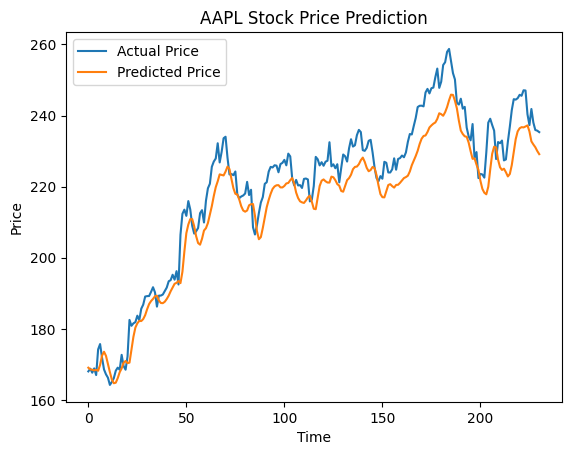

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - mae: 0.0407
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - mae: 0.0402
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0033 - mae: 0.0422
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0027 - mae: 0.0377
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0032 - mae: 0.0399
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030 - mae: 0.0406
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0028 - mae: 0.0398
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0029 - mae: 0.0397
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0029 - mae: 0.0378
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0028 - mae: 0.0384
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0029 - mae: 0.0398
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0026 - mae: 0.0377
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

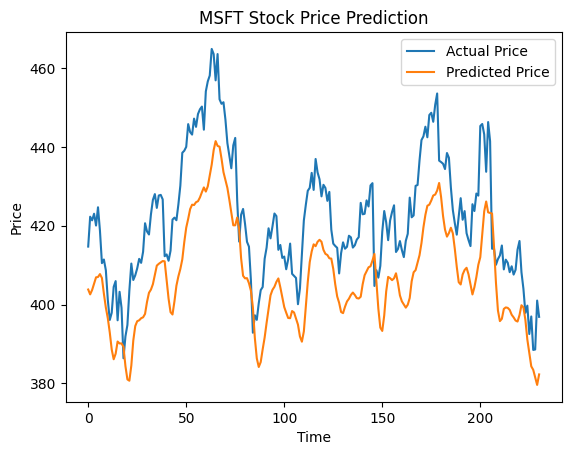

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026 - mae: 0.0386
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0028 - mae: 0.0394
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0028 - mae: 0.0397
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - mae: 0.0361
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0025 - mae: 0.0371
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - mae: 0.0382
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025 - mae: 0.0373
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024 - mae: 0.0365
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0025 - mae: 0.0361
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0024 - mae: 0.0352
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - mae: 0.0345
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025 - mae: 0.0366
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

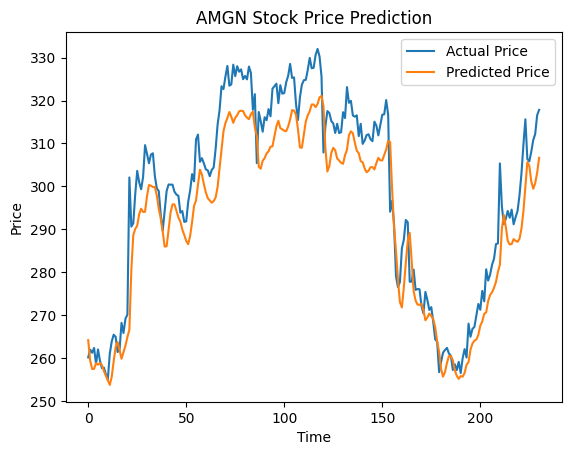

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0033 - mae: 0.0423
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0027 - mae: 0.0386
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0029 - mae: 0.0409
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0026 - mae: 0.0380
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029 - mae: 0.0398
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - mae: 0.0401
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - mae: 0.0407
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032 - mae: 0.0414
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0031 - mae: 0.0408
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025 - mae: 0.0364
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0026 - mae: 0.0374
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027 - mae: 0.0382
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

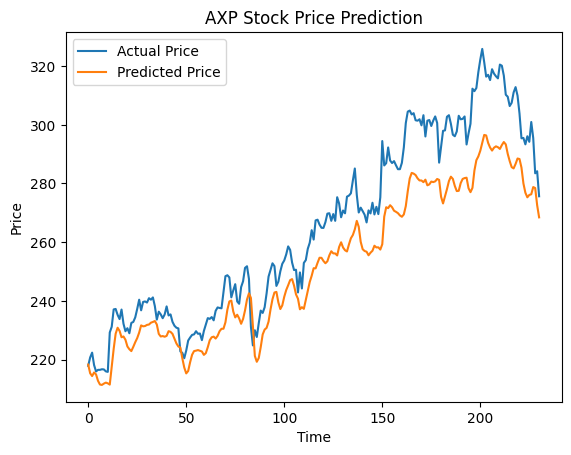

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039 - mae: 0.0458
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037 - mae: 0.0455
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039 - mae: 0.0469
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038 - mae: 0.0459
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0032 - mae: 0.0421
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0034 - mae: 0.0441
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0038 - mae: 0.0463
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0038 - mae: 0.0456
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - mae: 0.0427
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040 - mae: 0.0488
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - mae: 0.0441
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0034 - mae: 0.0432
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

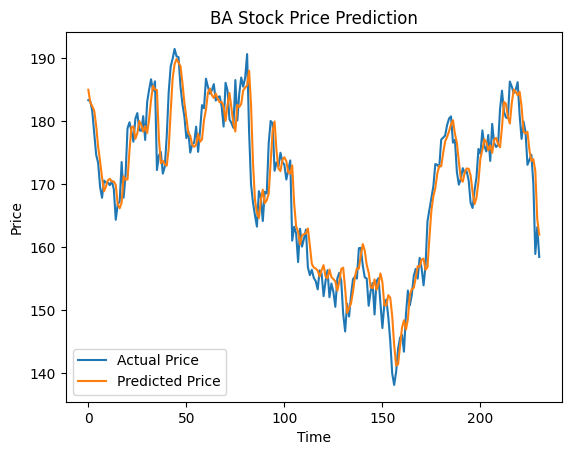

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024 - mae: 0.0343
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0034 - mae: 0.0425
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0030 - mae: 0.0395
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0020 - mae: 0.0330
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024 - mae: 0.0343
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021 - mae: 0.0324
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0023 - mae: 0.0338
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0028 - mae: 0.0344
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0024 - mae: 0.0336
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0022 - mae: 0.0322
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022 - mae: 0.0327
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024 - mae: 0.0339
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

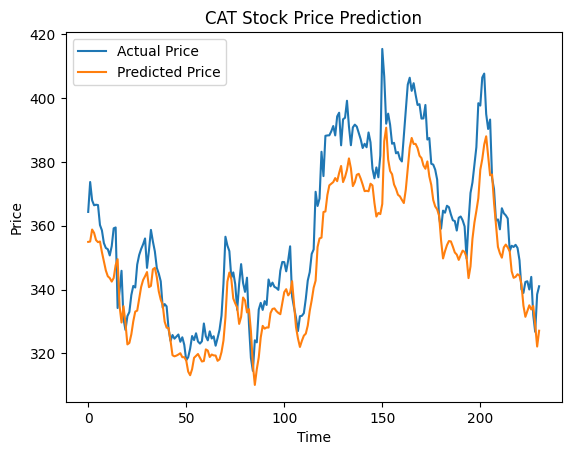

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032 - mae: 0.0423
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0037 - mae: 0.0449
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - mae: 0.0443
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0041 - mae: 0.0449
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0031 - mae: 0.0400
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037 - mae: 0.0428
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032 - mae: 0.0407
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039 - mae: 0.0419
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0035 - mae: 0.0439
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0036 - mae: 0.0423
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0032 - mae: 0.0399
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0037 - mae: 0.0436
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

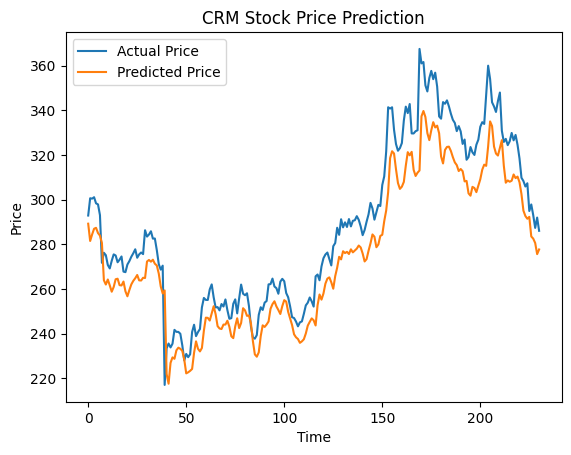

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036 - mae: 0.0449
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0035 - mae: 0.0425
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0035 - mae: 0.0427
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030 - mae: 0.0402
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0028 - mae: 0.0385
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029 - mae: 0.0397
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029 - mae: 0.0401
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027 - mae: 0.0399
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027 - mae: 0.0384
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031 - mae: 0.0416
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - mae: 0.0389
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028 - mae: 0.0399
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

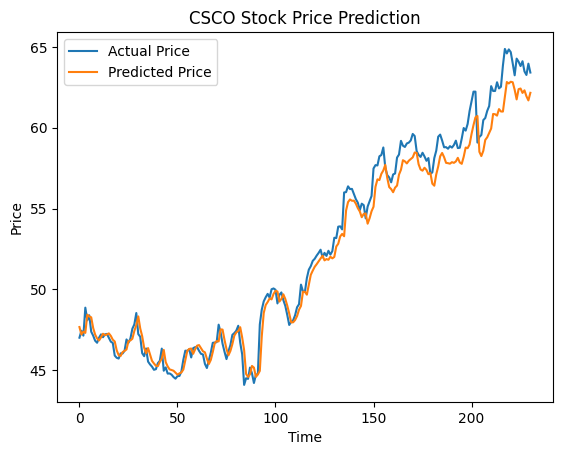

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040 - mae: 0.0481
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041 - mae: 0.0502
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0042 - mae: 0.0502
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0037 - mae: 0.0473
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0043 - mae: 0.0490
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0039 - mae: 0.0479
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0052 - mae: 0.0553
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0041 - mae: 0.0485
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - mae: 0.0519
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042 - mae: 0.0491
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - mae: 0.0499
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0046 - mae: 0.0525
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

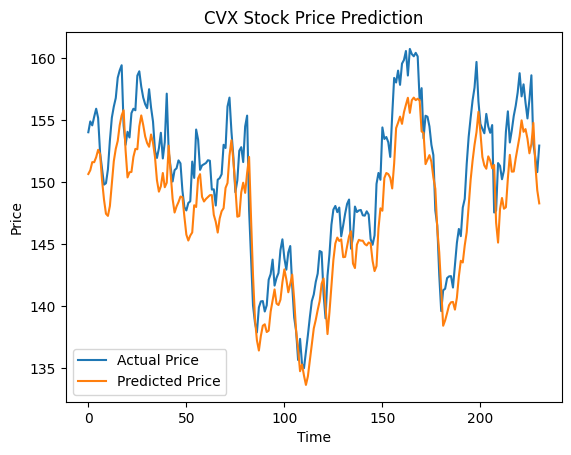

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0066 - mae: 0.0618
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0063 - mae: 0.0597
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0060 - mae: 0.0576
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mae: 0.0644
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058 - mae: 0.0565
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0059 - mae: 0.0569
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0054 - mae: 0.0556
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0057 - mae: 0.0588
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0052 - mae: 0.0562
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0058 - mae: 0.0578
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0058 - mae: 0.0591
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0064 - mae: 0.0598
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

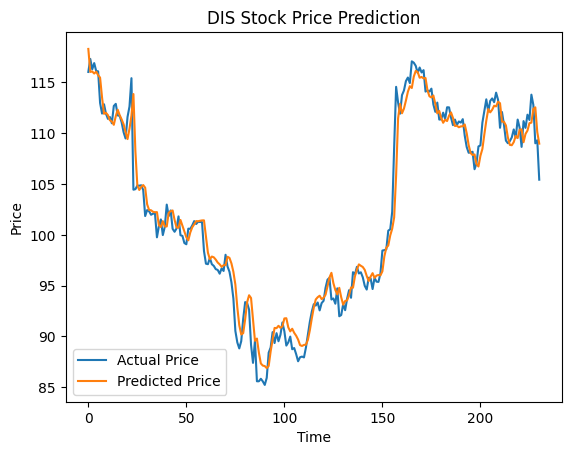

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053 - mae: 0.0554
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055 - mae: 0.0562
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0047 - mae: 0.0509
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0041 - mae: 0.0493
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044 - mae: 0.0482
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0040 - mae: 0.0487
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0034 - mae: 0.0443
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034 - mae: 0.0446
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0034 - mae: 0.0437
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030 - mae: 0.0409
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0030 - mae: 0.0413
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029 - mae: 0.0405
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

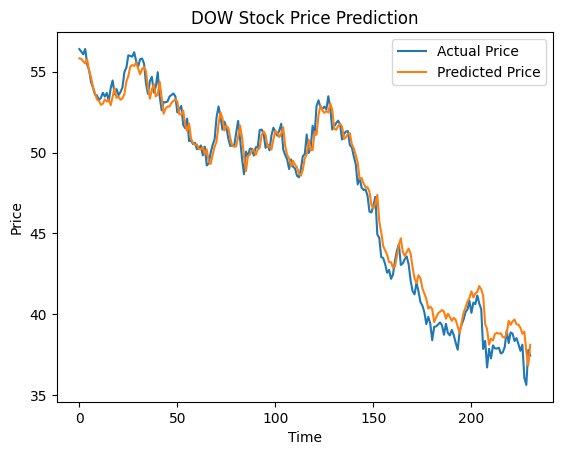

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0034 - mae: 0.0425
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0033 - mae: 0.0421
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - mae: 0.0400
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - mae: 0.0416
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033 - mae: 0.0423
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035 - mae: 0.0423
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0032 - mae: 0.0399
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0034 - mae: 0.0421
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035 - mae: 0.0411
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037 - mae: 0.0424
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036 - mae: 0.0427
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036 - mae: 0.0420
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

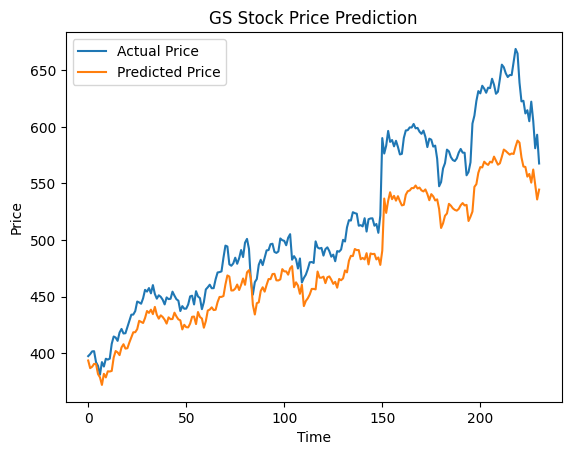

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0019 - mae: 0.0312
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0017 - mae: 0.0304
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0020 - mae: 0.0312
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0020 - mae: 0.0301
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0017 - mae: 0.0285
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0019 - mae: 0.0309
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - mae: 0.0321
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0017 - mae: 0.0278
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - mae: 0.0277
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0017 - mae: 0.0285
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - mae: 0.0267
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - mae: 0.0268
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

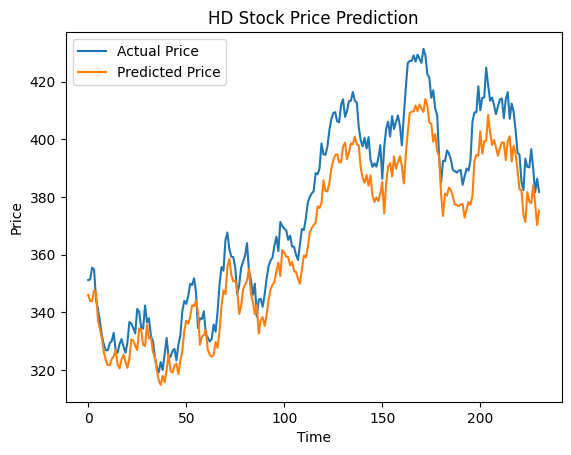

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0031 - mae: 0.0410
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0032 - mae: 0.0424
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0034 - mae: 0.0426
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0027 - mae: 0.0373
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028 - mae: 0.0398
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027 - mae: 0.0379
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025 - mae: 0.0372
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025 - mae: 0.0357
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025 - mae: 0.0353
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026 - mae: 0.0351
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0028 - mae: 0.0357
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0024 - mae: 0.0347
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

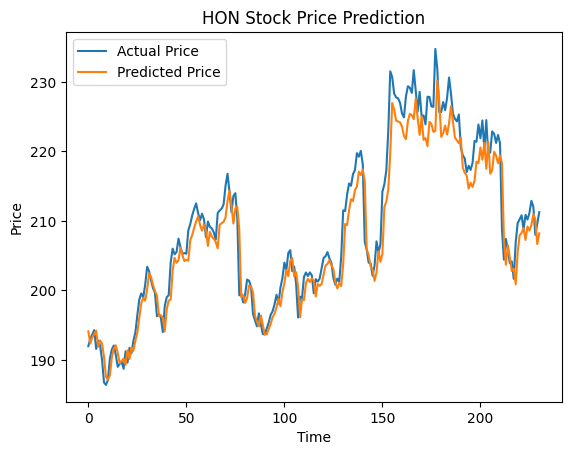

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0068 - mae: 0.0611
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0056 - mae: 0.0564
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - mae: 0.0539
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0054 - mae: 0.0556
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0047 - mae: 0.0513
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0040 - mae: 0.0467
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0042 - mae: 0.0472
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0034 - mae: 0.0428
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038 - mae: 0.0445
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031 - mae: 0.0404
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031 - mae: 0.0395
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0028 - mae: 0.0381
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

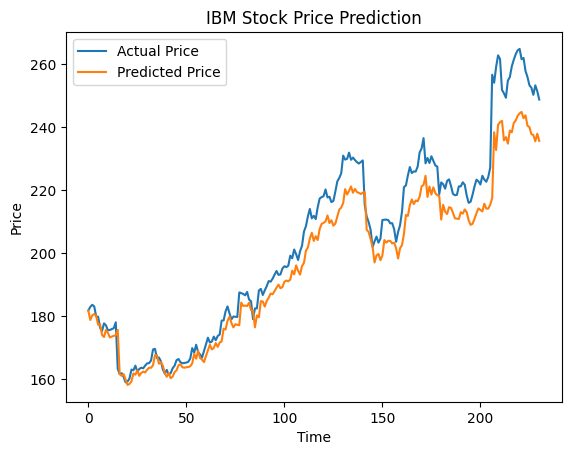

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034 - mae: 0.0423
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041 - mae: 0.0463
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042 - mae: 0.0476
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0042 - mae: 0.0465
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0038 - mae: 0.0454
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0043 - mae: 0.0472
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - mae: 0.0477
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0040 - mae: 0.0459
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0037 - mae: 0.0439
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0040 - mae: 0.0472
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0041 - mae: 0.0472
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0036 - mae: 0.0455
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

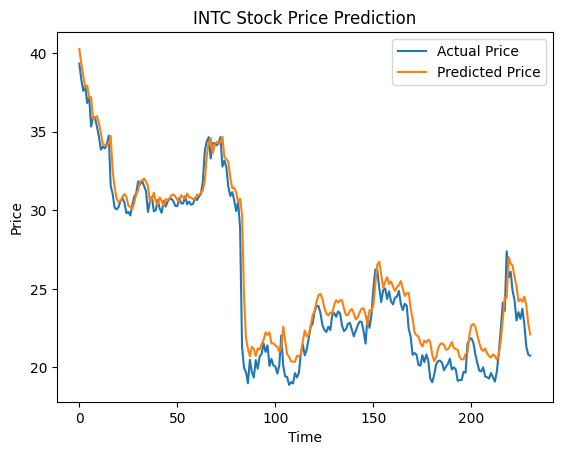

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046 - mae: 0.0509
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044 - mae: 0.0505
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042 - mae: 0.0468
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042 - mae: 0.0488
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0032 - mae: 0.0431
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0036 - mae: 0.0454
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0034 - mae: 0.0438
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0028 - mae: 0.0394
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0030 - mae: 0.0405
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0023 - mae: 0.0366
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0025 - mae: 0.0370
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0026 - mae: 0.0380
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

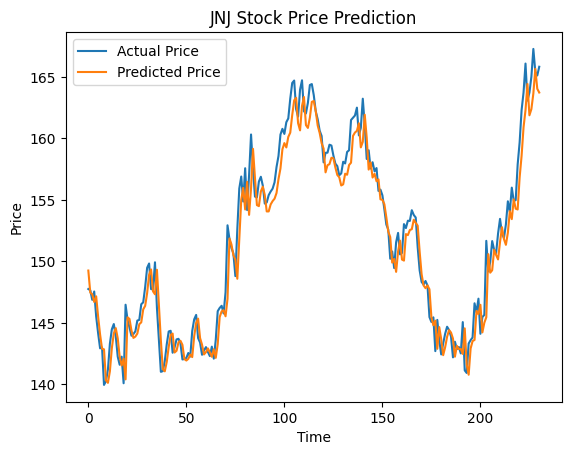

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040 - mae: 0.0397
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0037 - mae: 0.0394
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - mae: 0.0380
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031 - mae: 0.0385
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0034 - mae: 0.0397
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031 - mae: 0.0368
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0036 - mae: 0.0398
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0028 - mae: 0.0356
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027 - mae: 0.0353
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0028 - mae: 0.0353
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0028 - mae: 0.0366
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0026 - mae: 0.0352
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

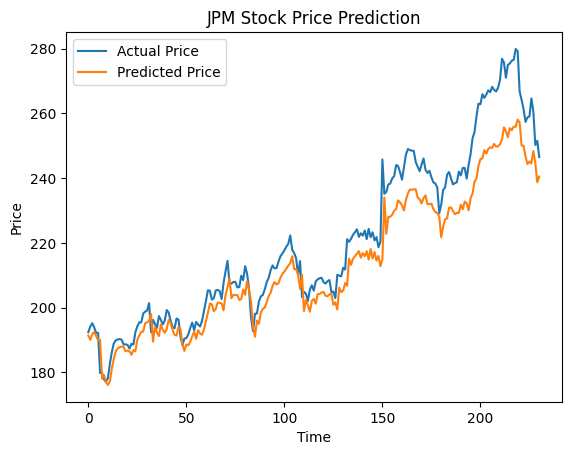

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051 - mae: 0.0514
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044 - mae: 0.0486
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043 - mae: 0.0476
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036 - mae: 0.0457
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0043 - mae: 0.0492
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036 - mae: 0.0453
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0039 - mae: 0.0458
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0038 - mae: 0.0448
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037 - mae: 0.0444
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0033 - mae: 0.0426
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043 - mae: 0.0501
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037 - mae: 0.0446
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

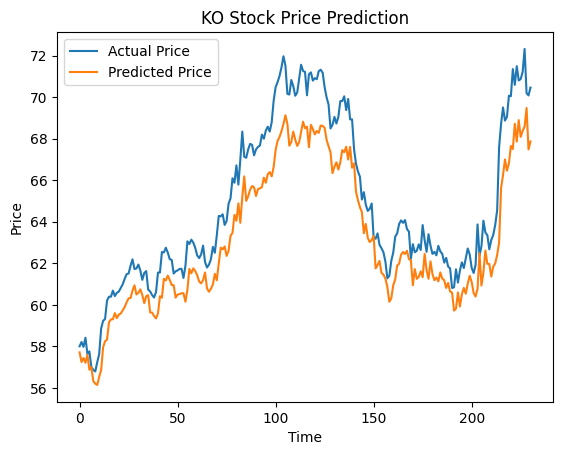

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023 - mae: 0.0343
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0026 - mae: 0.0359
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - mae: 0.0339
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025 - mae: 0.0348
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0030 - mae: 0.0385
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022 - mae: 0.0335
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0023 - mae: 0.0355
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026 - mae: 0.0356
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0024 - mae: 0.0347
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0025 - mae: 0.0357
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0023 - mae: 0.0346
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0029 - mae: 0.0369
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

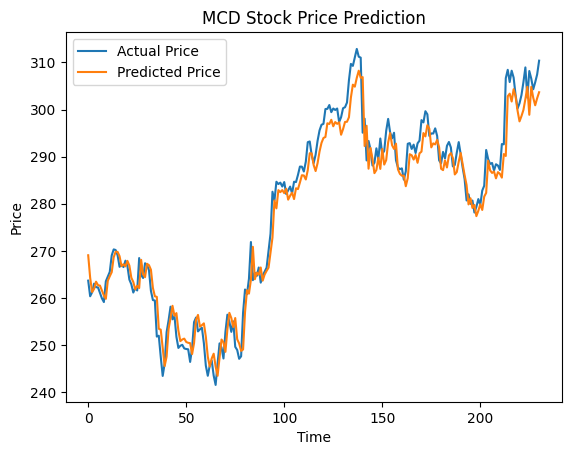

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052 - mae: 0.0518
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0056 - mae: 0.0533
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0061 - mae: 0.0552
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056 - mae: 0.0527
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0058 - mae: 0.0560
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055 - mae: 0.0543
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0059 - mae: 0.0553
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0057 - mae: 0.0558
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0047 - mae: 0.0516
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0053 - mae: 0.0527
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0046 - mae: 0.0498
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052 - mae: 0.0521
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

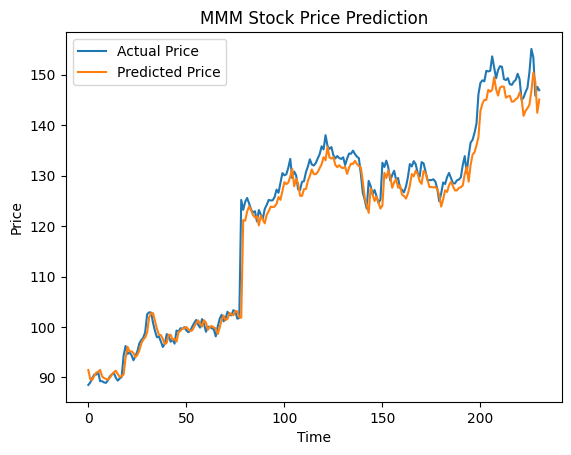

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - mae: 0.0495
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0045 - mae: 0.0510
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039 - mae: 0.0467
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041 - mae: 0.0471
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037 - mae: 0.0463
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0041 - mae: 0.0485
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035 - mae: 0.0452
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0035 - mae: 0.0440
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0040 - mae: 0.0477
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034 - mae: 0.0444
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0040 - mae: 0.0477
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0038 - mae: 0.0470
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

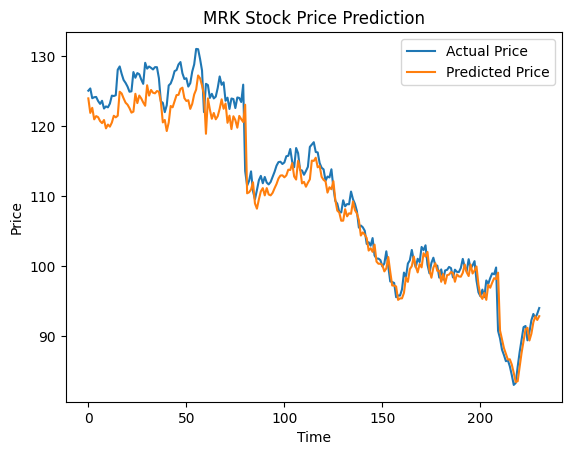

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0060 - mae: 0.0595
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0068 - mae: 0.0619
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0058 - mae: 0.0583
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0058 - mae: 0.0580
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0059 - mae: 0.0580
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0041 - mae: 0.0487
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0041 - mae: 0.0497
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039 - mae: 0.0473
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0039 - mae: 0.0472
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0044 - mae: 0.0504
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0042 - mae: 0.0498
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0039 - mae: 0.0486
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

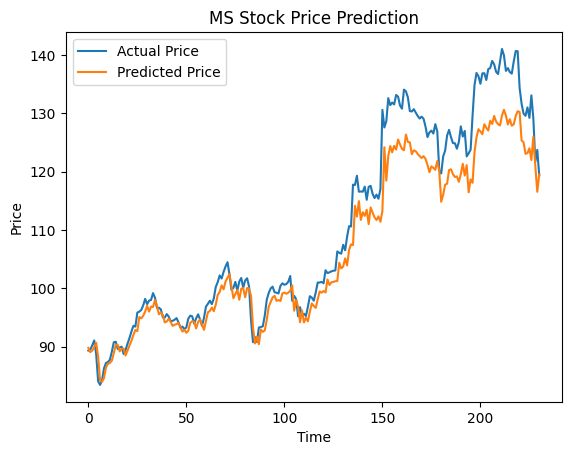

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031 - mae: 0.0394
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0027 - mae: 0.0368
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0030 - mae: 0.0396
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030 - mae: 0.0396
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - mae: 0.0382
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025 - mae: 0.0361
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034 - mae: 0.0407
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0021 - mae: 0.0335
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - mae: 0.0365
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0029 - mae: 0.0390
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - mae: 0.0384
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0020 - mae: 0.0328
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

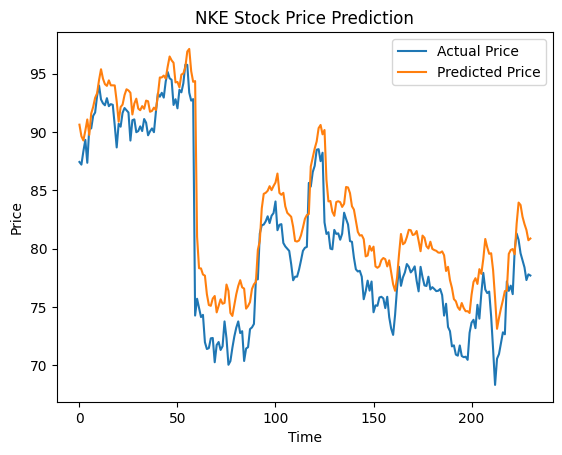

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0029 - mae: 0.0388
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - mae: 0.0398
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - mae: 0.0356
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027 - mae: 0.0374
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0027 - mae: 0.0371
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0024 - mae: 0.0356
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - mae: 0.0357
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0026 - mae: 0.0356
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024 - mae: 0.0354
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026 - mae: 0.0372
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027 - mae: 0.0369
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0022 - mae: 0.0346
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

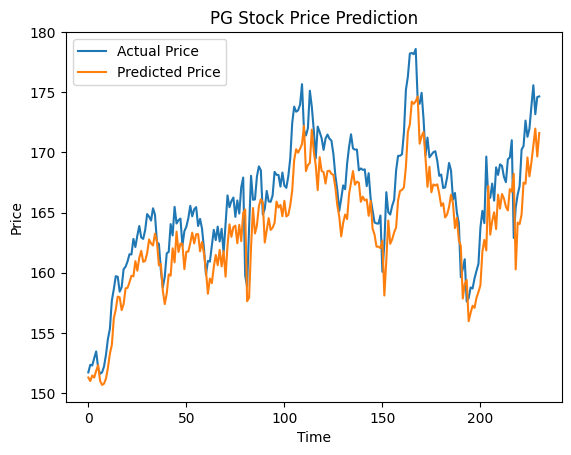

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0027 - mae: 0.0318
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0025 - mae: 0.0333
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - mae: 0.0343
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - mae: 0.0343
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - mae: 0.0325
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027 - mae: 0.0347
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0026 - mae: 0.0338
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0025 - mae: 0.0333
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0019 - mae: 0.0290
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025 - mae: 0.0329
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0020 - mae: 0.0295
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025 - mae: 0.0322
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

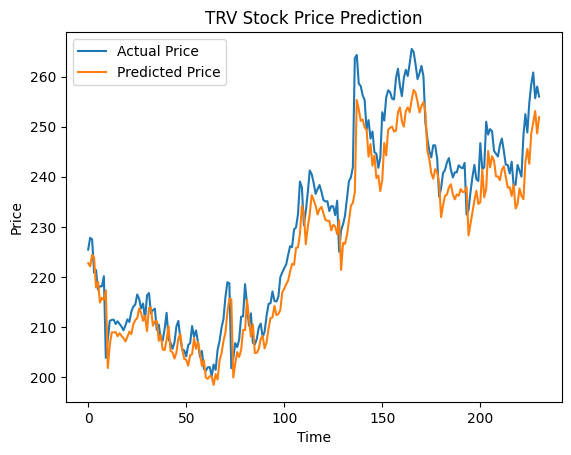

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0047 - mae: 0.0509
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0044 - mae: 0.0493
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0041 - mae: 0.0478
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037 - mae: 0.0459
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0036 - mae: 0.0451
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - mae: 0.0454
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0035 - mae: 0.0440
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033 - mae: 0.0428
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - mae: 0.0456
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0035 - mae: 0.0429
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034 - mae: 0.0441
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - mae: 0.0431
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

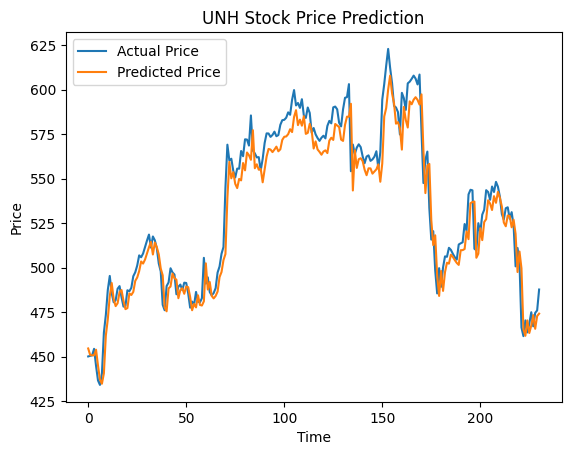

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023 - mae: 0.0337
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - mae: 0.0335
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0023 - mae: 0.0338
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - mae: 0.0326
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019 - mae: 0.0312
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0019 - mae: 0.0315
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - mae: 0.0305
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019 - mae: 0.0307
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0016 - mae: 0.0286
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0016 - mae: 0.0293
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0018 - mae: 0.0323
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0018 - mae: 0.0311
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

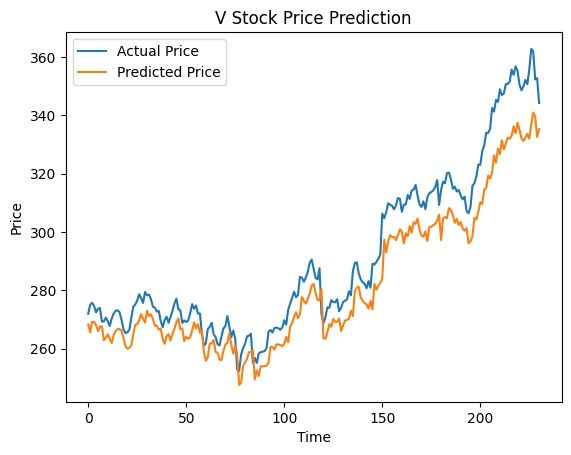

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0052 - mae: 0.0542
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0051 - mae: 0.0538
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0049 - mae: 0.0536
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0048 - mae: 0.0521
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0051 - mae: 0.0549
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0052 - mae: 0.0547
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0044 - mae: 0.0503
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0048 - mae: 0.0529
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0047 - mae: 0.0517
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0045 - mae: 0.0524
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0049 - mae: 0.0534
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0047 - mae: 0.0523
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

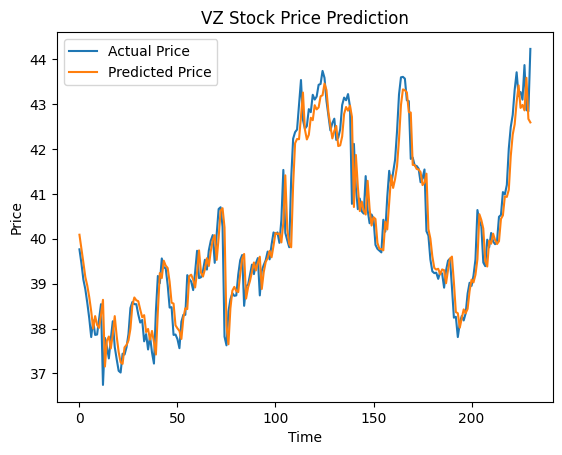

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0045 - mae: 0.0468
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0039 - mae: 0.0448
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0041 - mae: 0.0450
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039 - mae: 0.0454
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0040 - mae: 0.0457
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0043 - mae: 0.0475
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0044 - mae: 0.0489
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037 - mae: 0.0437
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0036 - mae: 0.0433
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043 - mae: 0.0463
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0038 - mae: 0.0448
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0042 - mae: 0.0452
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

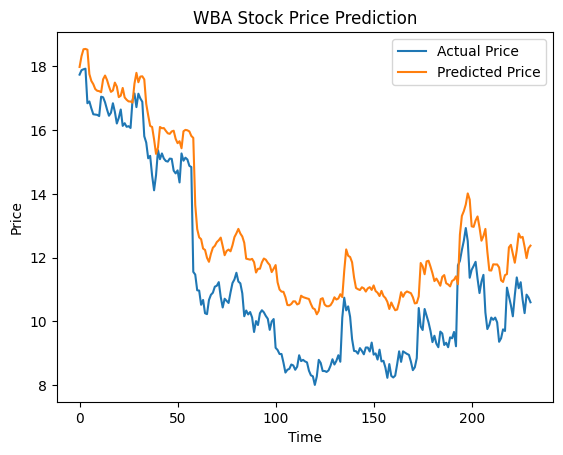

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019 - mae: 0.0316
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022 - mae: 0.0313
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0017 - mae: 0.0295
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0018 - mae: 0.0304
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0019 - mae: 0.0299
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0018 - mae: 0.0300
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019 - mae: 0.0308
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0017 - mae: 0.0305
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - mae: 0.0284
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0018 - mae: 0.0304
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0020 - mae: 0.0308
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0017 - mae: 0.0295
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━

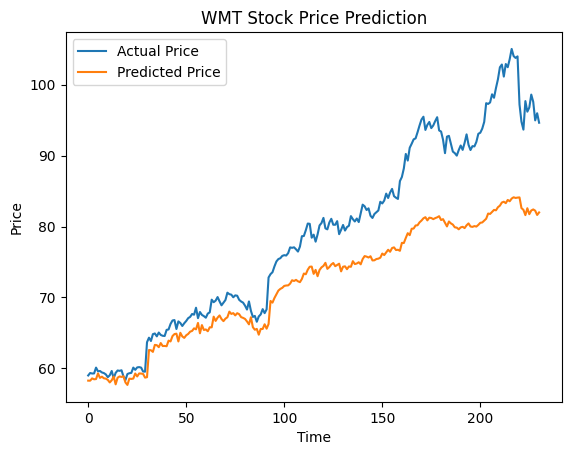

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for the LSTM model
def create_dataset(dataset, look_back=10):
  X, Y = [], []
  for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      X.append(a)
      Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

for ticker in djia_tickers:
    msft_data = stock_data[ticker]['Close']
    msft_data = msft_data.values.reshape(-1, 1)

    # Normalize the data
    from sklearn.preprocessing import MinMaxScaler

    train_size = int(len(msft_data) * 0.8)  # 80% for training
    train_data, test_data = msft_data[0:train_size, :], msft_data[train_size:len(msft_data), :]

    # Now fit the scaler only on the training data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(train_data)

    # Transform both train and test data using the fitted scaler
    train_data_scaled = scaler.transform(train_data)
    test_data_scaled = scaler.transform(test_data)


    look_back = 20
    X_train, Y_train = create_dataset(train_data_scaled, look_back)
    X_test, Y_test = create_dataset(test_data_scaled, look_back)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Train the model
    best_model.fit(X_train, Y_train, epochs=20, batch_size=64, verbose=1) # Adjust epochs and batch_size


    # Make predictions
    test_predict = best_model.predict(X_test)


    # Invert predictions to original scale
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform([Y_test])

    #Plot the predictions
    plt.plot(Y_test[0], label="Actual Price")
    plt.plot(test_predict, label="Predicted Price")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("{0} Stock Price Prediction".format(ticker))
    plt.legend()
    plt.show()